In [38]:
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
game_df = pd.read_csv(r"..\data\game_shots\b25d739e-c706-4a09-bd87-ea0951d4a285.csv")
game_df.head()

,Unnamed: 0,shot_taker_name,is_orange,time,xg,goal
0,0,enpitsu,0,8.0,0.022644,False
1,1,games5425898691,0,123.0,0.989970,True
2,2,games5425898691,0,146.0,0.679090,True
3,3,Krazytrainツ,1,161.0,0.949391,True
4,4,venom-murkzz,1,177.0,0.016087,False


In [43]:
game_df.loc[-1] = {'time': 0, 'shot_taker_name': '-'}
game_df.index += 1
game_df.sort_index(inplace=True)
game_df.loc[len(game_df)] = {'time': max(300, game_df['time'].max()), 'shot_taker_name': '-'}
orange_xg_sum = game_df[game_df['is_orange']==1]['xg'].cumsum()
game_df['orange_xg_sum'] = orange_xg_sum
blue_xg_sum = game_df[game_df['is_orange']==0]['xg'].cumsum()
game_df['blue_xg_sum'] = blue_xg_sum
game_df.fillna(method='ffill', inplace=True)
game_df.fillna(value=0, inplace=True)

In [44]:
game_df

,Unnamed: 0,shot_taker_name,is_orange,time,xg,goal,orange_xg_sum,blue_xg_sum
0,0.0,-,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,enpitsu,0.0,8.0,0.022644,0.0,0.000000,0.022644
2,1.0,games5425898691,0.0,123.0,0.989970,1.0,0.000000,1.012614
3,2.0,games5425898691,0.0,146.0,0.679090,1.0,0.000000,1.691704
4,3.0,Krazytrainツ,1.0,161.0,0.949391,1.0,0.949391,1.691704
5,4.0,venom-murkzz,1.0,177.0,0.016087,0.0,0.965479,1.691704
6,5.0,Krazytrainツ,1.0,180.0,0.039704,0.0,1.005183,1.691704
7,6.0,Krazytrainツ,1.0,213.0,0.009671,0.0,1.014854,1.691704
8,7.0,games5425898691,0.0,242.0,0.228935,1.0,1.014854,1.920639
9,8.0,games5425898691,0.0,281.0,0.986941,1.0,1.014854,2.907580


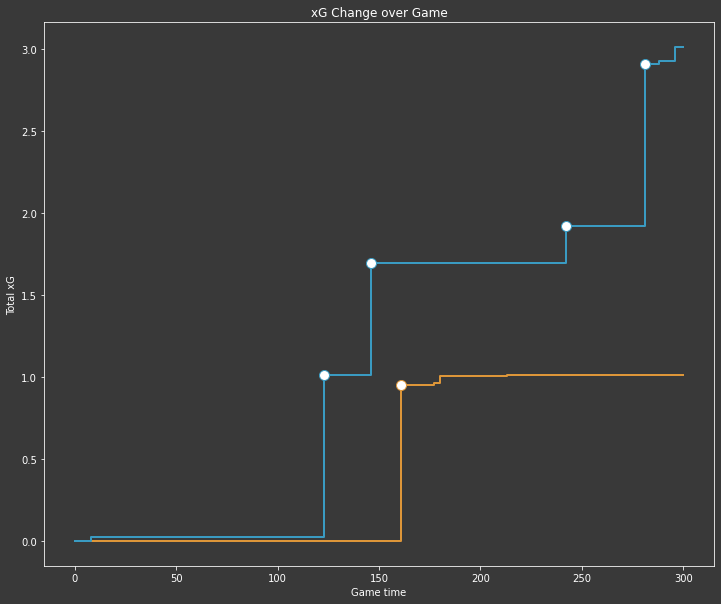

In [191]:
with plt.rc_context({
    'axes.edgecolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'figure.facecolor': '#393939',
    'axes.labelcolor': 'white',
    'axes.facecolor': '#393939',
    }):
    fig, ax = plt.subplots(figsize=(12,10))
    # ax.set_facecolor('gray')
    # fig.set_facecolor('gray')
    game_df.plot(drawstyle='steps-post', x='time', y='orange_xg_sum', linewidth=2, c='#DD9639', ax=ax, legend=False, zorder=0)
    game_df.plot(drawstyle='steps-post', x='time', y='blue_xg_sum', linewidth=2, c='#3A9BC2', ax=ax, legend=False, zorder=0)
    game_df[(game_df['goal']==1) & (game_df['is_orange']==1)].reset_index().plot.scatter(x='time', y='orange_xg_sum', ax=ax, edgecolor='#DD9639', s=100, c='white', zorder=1)
    game_df[(game_df['goal']==1) & (game_df['is_orange']==0)].reset_index().plot.scatter(x='time', y='blue_xg_sum', ax=ax, edgecolor='#3A9BC2', s=100, c='white', zorder=1)
    plt.title("xG Change over Game", color='white')
    plt.ylabel("Total xG")
    plt.xlabel("Game time")
    